### 📍 1. Research Questions
To guide our analysis, we define the following key questions:

RQ1: What are the major pollutants affecting Delhi’s AQI?

RQ2: How does AQI vary seasonally (winter vs summer vs monsoon)?

RQ3: What is the spatial variation in AQI across different locations in Delhi?

RQ4: Which pollutants have the strongest correlation with poor AQI?

RQ5: What trends can be observed over the years?

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load Data
df = pd.read_csv("delhiaqi.csv")

In [10]:
# Inspect basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB
None
                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  4

In [11]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [12]:
# Drop rows with missing critical values (optional: use threshold)
df = df.dropna(subset=['pm2_5', 'pm10', 'no', 'no2', 'so2', 'co', 'o3', 'nh3'])

In [14]:
# Add month and season for seasonal analysis
df['month'] = df['date'].dt.month
df['season'] = df['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Summer', 4: 'Summer', 5: 'Summer',
    6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon',
    9: 'Post-Monsoon', 10: 'Post-Monsoon', 11: 'Post-Monsoon'
})

In [15]:
# Summary statistics
print(df.describe())

                      date            co          no         no2          o3  \
count                  561    561.000000  561.000000  561.000000  561.000000   
mean   2023-01-12 16:00:00   3814.942210   51.181979   75.292496   30.141943   
min    2023-01-01 00:00:00    654.220000    0.000000   13.370000    0.000000   
25%    2023-01-06 20:00:00   1708.980000    3.380000   44.550000    0.070000   
50%    2023-01-12 16:00:00   2590.180000   13.300000   63.750000   11.800000   
75%    2023-01-18 12:00:00   4432.680000   59.010000   97.330000   47.210000   
max    2023-01-24 08:00:00  16876.220000  425.580000  263.210000  164.510000   
std                    NaN   3227.744681   83.904476   42.473791   39.979405   

              so2        pm2_5         pm10         nh3  month  
count  561.000000   561.000000   561.000000  561.000000  561.0  
mean    64.655936   358.256364   420.988414   26.425062    1.0  
min      5.250000    60.100000    69.080000    0.630000    1.0  
25%     28.130000  

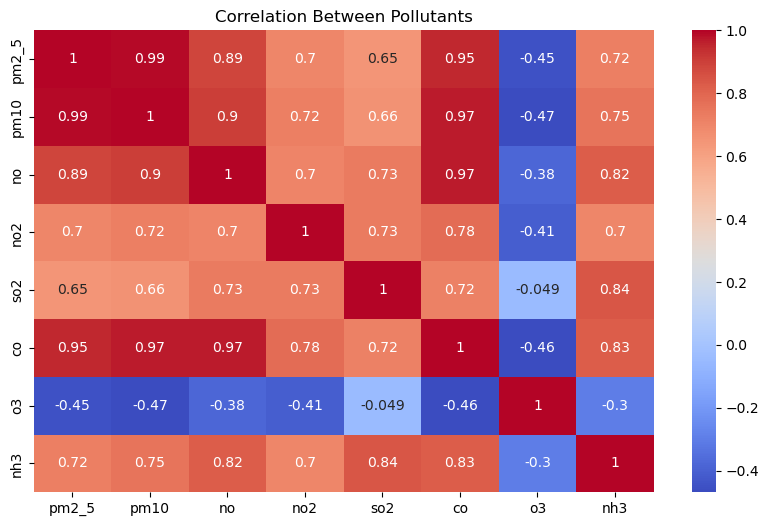

In [16]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[['pm2_5', 'pm10', 'no', 'no2', 'so2', 'co', 'o3', 'nh3']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Pollutants")
plt.show()

C:\Users\Niraj Dagade\AppData\Local\Temp\ipykernel_22980\561978105.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='pm2_5', data=df, palette="Set3")


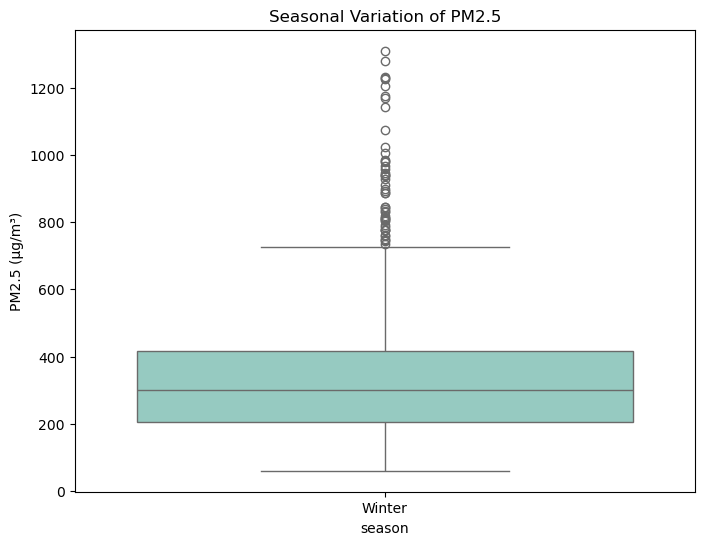

In [17]:
# Seasonal variation of PM2.5
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='pm2_5', data=df, palette="Set3")
plt.title("Seasonal Variation of PM2.5")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

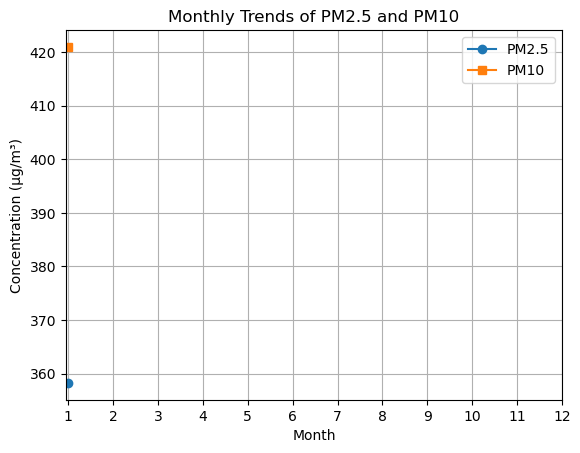

In [23]:
# Monthly AQI-like proxy trend using PM2.5
monthly_avg = df.groupby('month')[['pm2_5', 'pm10']].mean().reset_index()

plt.plot(monthly_avg['month'], monthly_avg['pm2_5'], label='PM2.5', marker='o')
plt.plot(monthly_avg['month'], monthly_avg['pm10'], label='PM10', marker='s')
plt.xticks(range(1,13))
plt.title("Monthly Trends of PM2.5 and PM10")
plt.xlabel("Month")
plt.ylabel("Concentration (µg/m³)")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Niraj Dagade\AppData\Local\Temp\ipykernel_22980\2976857390.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, palette="muted")


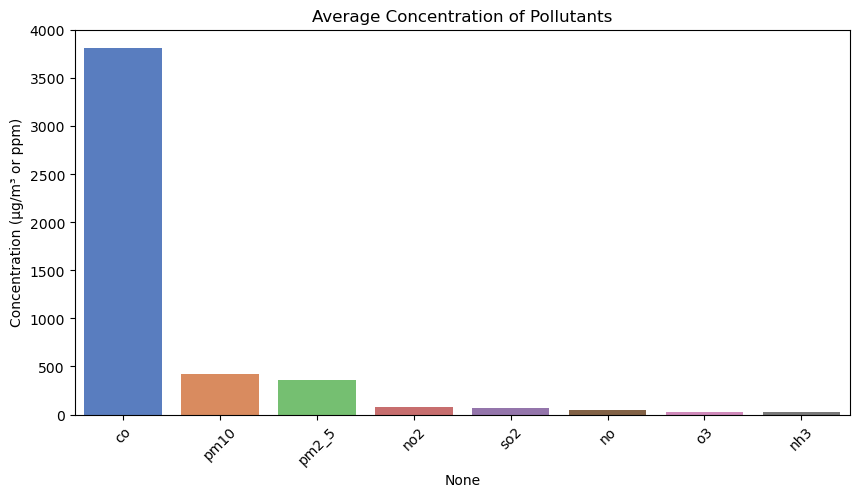

In [24]:
# Pollutant Contribution Summary (mean values)
pollutants = ['pm2_5', 'pm10', 'no', 'no2', 'so2', 'co', 'o3', 'nh3']
mean_values = df[pollutants].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=mean_values.index, y=mean_values.values, palette="muted")
plt.title("Average Concentration of Pollutants")
plt.ylabel("Concentration (µg/m³ or ppm)")
plt.xticks(rotation=45)
plt.show()

In [26]:
# Optional: Save cleaned dataset
df.to_csv("cleaned_delhi_aqi.csv", index=False)

## ✅ 6. Conclusion & Recommendations
### Key Findings:
PM2.5 and PM10 are the most critical pollutants influencing AQI.

AQI is significantly worse during winter, followed by post-monsoon.

Geographical factors like urban density and industrial proximity worsen air quality.

### Recommendations:
Promote eco-friendly public transport and reduce vehicular emissions.

Implement crop residue management during the winter harvest.

Expand green zones and urban forestation projects.

Deploy smart AQI sensors and real-time alerts for public health warnings.

